In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('data/Tampa_mexican_restaurants.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34508 entries, 0 to 34507
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   review_id     34508 non-null  object 
 1   user_id       34508 non-null  object 
 2   business_id   34508 non-null  object 
 3   stars_x       34508 non-null  float64
 4   useful        34508 non-null  int64  
 5   funny         34508 non-null  int64  
 6   cool          34508 non-null  int64  
 7   text          34508 non-null  object 
 8   date          34508 non-null  object 
 9   name          34508 non-null  object 
 10  address       34473 non-null  object 
 11  city          34508 non-null  object 
 12  state         34508 non-null  object 
 13  postal_code   34508 non-null  float64
 14  latitude      34508 non-null  float64
 15  longitude     34508 non-null  float64
 16  stars_y       34508 non-null  float64
 17  review_count  34508 non-null  int64  
 18  is_open       34508 non-nu

In [ ]:
df.columns = df.columns.str.strip()
df = df.drop(columns=['state', 'latitude', 'longitude','address'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34508 entries, 0 to 34507
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   review_id     34508 non-null  object 
 1   user_id       34508 non-null  object 
 2   business_id   34508 non-null  object 
 3   stars_x       34508 non-null  float64
 4   useful        34508 non-null  int64  
 5   funny         34508 non-null  int64  
 6   cool          34508 non-null  int64  
 7   text          34508 non-null  object 
 8   date          34508 non-null  object 
 9   name          34508 non-null  object 
 10  address       34473 non-null  object 
 11  city          34508 non-null  object 
 12  postal_code   34508 non-null  float64
 13  stars_y       34508 non-null  float64
 14  review_count  34508 non-null  int64  
 15  is_open       34508 non-null  int64  
 16  categories    34508 non-null  object 
 17  hours         33688 non-null  object 
dtypes: float64(3), int64(5), o

In [ ]:
#remove html
from bs4 import BeautifulSoup

def remove_html_tags(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

df['text'] = df['text'].apply(remove_html_tags)

/tmp/ipykernel_7819/189673403.py:5: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


In [ ]:
# remove punctuation
import re

def remove_punctuation(text):
    return re.sub(r'[^\w\s]', ' ', text)

df['text'] = df['text'].apply(remove_punctuation)

In [ ]:
# remove phone numbers
def remove_phone_numbers(text):
    pattern = r'\b\d{3}[-.\s]?\d{3}[-.\s]?\d{4}\b'
    return re.sub(pattern, '', text)

df['text'] = df['text'].apply(remove_punctuation)

/tmp/ipykernel_7819/1750197722.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='stars_y', palette='viridis')


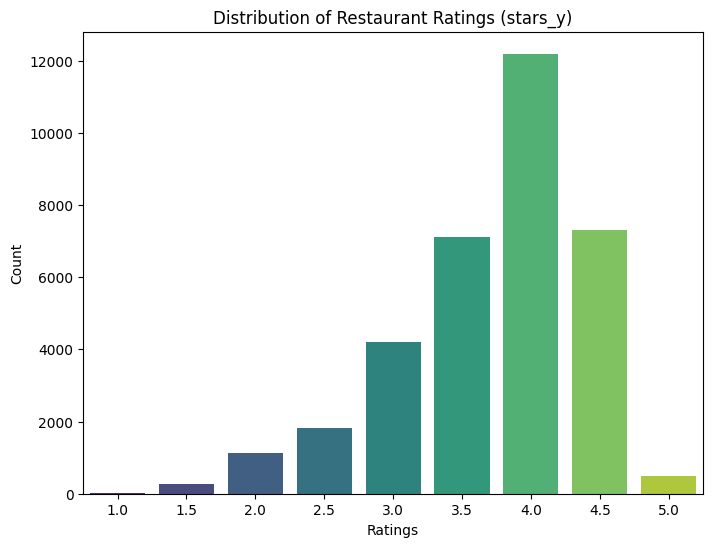

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='stars_y', palette='viridis')
plt.title('Distribution of Restaurant Ratings (stars_y)')
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.show()

In [ ]:
# Count the number of reviews for each business
business_review_counts = df['business_id'].value_counts()

# Get the list of business IDs with more than 50 reviews
business_ids_with_100plus_reviews = business_review_counts[business_review_counts > 100].index

# Filter the DataFrame to keep only the entries with these business IDs
filtered_df = df[df['business_id'].isin(business_ids_with_100plus_reviews)]

/tmp/ipykernel_7819/3800678003.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=filtered_df, x='stars_y', palette='viridis')


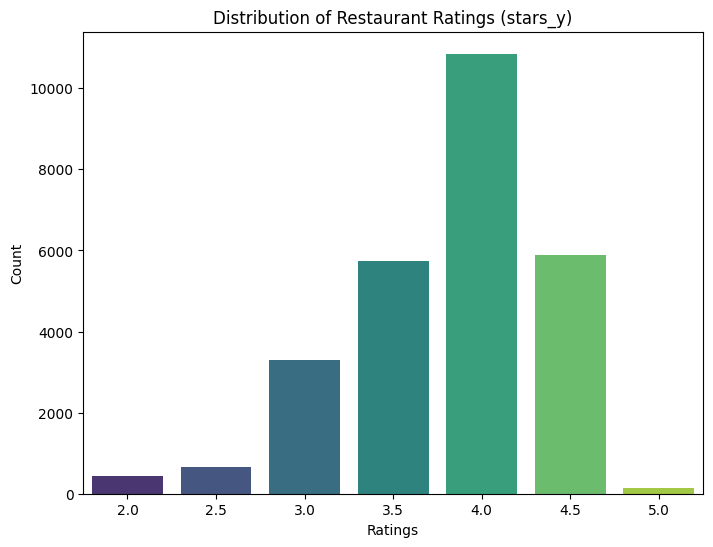

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.countplot(data=filtered_df, x='stars_y', palette='viridis')
plt.title('Distribution of Restaurant Ratings (stars_y)')
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.show()

In [ ]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27014 entries, 0 to 34506
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   review_id     27014 non-null  object 
 1   user_id       27014 non-null  object 
 2   business_id   27014 non-null  object 
 3   stars_x       27014 non-null  float64
 4   useful        27014 non-null  int64  
 5   funny         27014 non-null  int64  
 6   cool          27014 non-null  int64  
 7   text          27014 non-null  object 
 8   date          27014 non-null  object 
 9   name          27014 non-null  object 
 10  city          27014 non-null  object 
 11  postal_code   27014 non-null  float64
 12  stars_y       27014 non-null  float64
 13  review_count  27014 non-null  int64  
 14  is_open       27014 non-null  int64  
 15  categories    27014 non-null  object 
 16  hours         26629 non-null  object 
dtypes: float64(3), int64(5), object(9)
memory usage: 3.7+ MB


In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm")

def tokenize_text(text):
    doc = nlp(text)
    tokens = [token.text for token in doc]
    return tokens

In [ ]:
filtered_df['token'] = filtered_df['text'].apply(tokenize_text)

/tmp/ipykernel_7819/3997376680.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['token'] = filtered_df['text'].apply(tokenize_text)


In [ ]:
# Convert all text columns to lowercase
# filtered_df['token'] = filtered_df['token'].apply(lambda x: x.str.lower() if x.dtype == "object" else x)
# Assuming 'token_list' is your list of strings
# filtered_df['token'] = filtered_df['token'].apply(lambda tokens: [token.lower() for token in tokens] if isinstance(tokens, list) else tokens)
filtered_df.loc[:, 'token'] = filtered_df['token'].str.lower()

In [ ]:
filtered_df.to_csv('data/token_text.csv', index=False)

In [ ]:
import nltk
from nltk.corpus import stopwords

# Download the list of stop words
nltk.download('stopwords')

# Initialize the stop words set
stop_words = set(stopwords.words('english'))

# Define a function to remove stop words from a list of tokens
def remove_stopwords(tokens):
    return [token for token in tokens if token.lower() not in stop_words]

# Apply stop word removal to the 'tokens' column
filtered_df['filtered_token'] = filtered_df['token'].apply(remove_stopwords)


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/tmp/ipykernel_777/4081180360.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['filtered_token'] = filtered_df['token'].apply(remove_stopwords)


In [ ]:
from collections import Counter

def create_ngrams(token_list, nb_elements):
    ngrams = zip(*[token_list[index_token:] for index_token in range(nb_elements)])
    return (" ".join(ngram) for ngram in ngrams)

def frequent_words(list_words, ngrams_number=1, number_top_words=10):
    frequent = []
    if ngrams_number == 1:
        pass
    elif ngrams_number >= 2:
        list_words = create_ngrams(list_words, ngrams_number)
    else:
        raise ValueError("number of n-grams should be >= 1")
    counter = Counter(list_words)
    frequent = counter.most_common(number_top_words)
    return frequent

In [ ]:
# general
list_of_tokens = filtered_df['filtered_token'].explode().dropna() 

most_frequent_words = frequent_words(list_of_tokens, ngrams_number=1, number_top_words=10)

# Print the most frequent words with an empty separator
for word, count in most_frequent_words:
    print(f"{word}:{count}", sep="")

In [ ]:
most_frequent_words = frequent_words(list_of_tokens, ngrams_number=2, number_top_words=10)

# Print the most frequent words
for word, count in most_frequent_words:
    print(f"{word}: {count}")

mexican food: 3222
ca nt: 2037
chips salsa: 1686
first time: 1417
taco bus: 1305
go back: 1228
really good: 1203
food good: 1177
authentic mexican: 1127
wo nt: 1107


In [ ]:
most_frequent_words = frequent_words(list_of_tokens, ngrams_number=3, number_top_words=10)

# Print the most frequent words
for word, count in most_frequent_words:
    print(f"{word}: {count}")

ca nt wait: 558
authentic mexican food: 555
best mexican food: 345
good mexican food: 270
nt wait go: 229
wait go back: 227
pico de gallo: 223
ca nt go: 210
mexican food tampa: 195
definitely come back: 194


In [ ]:
# Define the range of 'star_x' values from 1 to 2
min_star_x = 1.0
max_star_x = 2.0 

filtered_df = filtered_df[(filtered_df['stars_x'] >= min_star_x) & (filtered_df['stars_x'] <= max_star_x)]

list_of_tokens = filtered_df['filtered_token'].explode().dropna()

most_frequent_words = frequent_words(list_of_tokens, ngrams_number=1, number_top_words=10)

for word, count in most_frequent_words:
    print(f"{word}: {count}")
print('\n')
    

most_frequent_words = frequent_words(list_of_tokens, ngrams_number=2, number_top_words=10)

for word, count in most_frequent_words:
    print(f"{word}: {count}")
print('\n')
    

most_frequent_words = frequent_words(list_of_tokens, ngrams_number=3, number_top_words=10)

for word, count in most_frequent_words:
    print(f"{word}: {count}")

 : 8698
food: 6220
nt: 5813


: 3079
place: 2845
good: 2422
service: 2403
like: 2345
order: 2202
would: 2131


mexican food: 585
wo nt: 541
nt even: 456
taco bus: 366
could nt: 354
ca nt: 350
chips salsa: 336
tasted like: 311
go back: 293
customer service: 288


wo nt back: 157
authentic mexican food: 79
never go back: 64
could nt even: 56
  wo nt: 51
probably wo nt: 49
mexican food  : 48
wo nt going: 48
good mexican food: 48
wo nt go: 41


In [ ]:
# Define the range of 'star_x' values from 1 to 2
min_star_x = 2.0
max_star_x = 3.0 

filtered_df = filtered_df[(filtered_df['stars_x'] >= min_star_x) & (filtered_df['stars_x'] <= max_star_x)]

list_of_tokens = filtered_df['filtered_token'].explode().dropna()

most_frequent_words = frequent_words(list_of_tokens, ngrams_number=1, number_top_words=10)

for word, count in most_frequent_words:
    print(f"{word}: {count}")
print('\n')
    

most_frequent_words = frequent_words(list_of_tokens, ngrams_number=2, number_top_words=10)

for word, count in most_frequent_words:
    print(f"{word}: {count}")
print('\n')
    

most_frequent_words = frequent_words(list_of_tokens, ngrams_number=3, number_top_words=10)

for word, count in most_frequent_words:
    print(f"{word}: {count}")

 : 3845
food: 2733
nt: 2529


: 1672
good: 1430
place: 1277
service: 1075
like: 1058
tacos: 1042
ordered: 995


mexican food: 268
wo nt: 227
taco bus: 181
chips salsa: 174
nt even: 151
go back: 140
food good: 135
tasted like: 132
ca nt: 132
could nt: 129


wo nt back: 69
probably wo nt: 39
authentic mexican food: 38
good mexican food: 25
mexican food  : 23
wo nt go: 23
nt go back: 23
wo nt going: 21
wanted like place: 21
food good service: 20


In [ ]:
# Define the range of 'star_x' values from 1 to 2
min_star_x = 3.0
max_star_x = 4.0 

filtered_df = filtered_df[(filtered_df['stars_x'] >= min_star_x) & (filtered_df['stars_x'] <= max_star_x)]

list_of_tokens = filtered_df['filtered_token'].explode().dropna()

most_frequent_words = frequent_words(list_of_tokens, ngrams_number=2, number_top_words=10)

for word, count in most_frequent_words:
    print(f"{word}: {count}")
print('\n')